# L1 Optimization as LP

## This notebook is almost complete. I am looking for ideas on how to complete it best

In [3]:
!pip install cvxpy

  Using cached cvxpy-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.8 kB)
  Using cached osqp-0.6.5-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached ecos-2.0.13-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.0 kB)
  Using cached clarabel-0.7.1-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.6 kB)
  Using cached scs-3.2.4.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached pybind11-2.11.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached qdldl-0.1.7.post0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.7 kB)
Using cached cvxpy-1.4.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.2 MB)
Using cached clarabel-0.7.1-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.3 MB)
Using cached ecos-2.0.13-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x

In [26]:
!pip install ortools

  Using cached ortools-9.9.3963-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached immutabledict-4.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached ortools-9.9.3963-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (24.8 MB)
Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
Using cached immutabledict-4.2.0-py3-none-any.whl (4.7 kB)
Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.24.4
    Uninstalling protobuf-4.24.4:
      Successfully uninstalled protobuf-4.24.4


In [4]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
import cvxpy as cp

# np.random.seed(123)

### Overdetermined Systems

Suppose $A$ is $m \times n$ where $m > n$. Then we say $A \mathbf{x} = \mathbf{b}$ is overdetermined. There are more equations than variables and so there is (most likely) no solution. What do we do? Find a vector $\mathbf{x}$ that is close enough. If we use the 2-norm (see [Wikipedia: Norm](https://en.wikipedia.org/wiki/Norm_(mathematics)#p-norm)). This is the usual least squares: minimize $\| \mathbf{b} - A \mathbf{x} \|_2$.

But we can use other notions of "close enough" such as the 1-norm: minimize $\| A \mathbf{x} - \mathbf{b} \|_1$. This is a LP problem because the following problems are equivalent:

1. Minimize $\| A \mathbf{x} - \mathbf{b} \|_1$.
2. Minimize $\sum_n t_n$ subject to $-\mathbf{t} \leq A \mathbf{x} - \mathbf{b} \leq \mathbf{t}$, $\mathbf{t} \geq 0$.

### Underdetermined Systems

Suppose $A$ is $m \times n$ where $m < n$. Then we say $A \mathbf{x} = \mathbf{b}$ is underdetermined. There are more variables than equations and so there is (most likely) infinitely many solutions. So what do we do? Find a solution $\mathbf{x}$ which minmizes a cost. If we choose th 1-norm then the result will more likely be sparse vectors (ie. vectors where most entries are 0).

## L1 Regression

### Linear Regression

The following are equivalent:

1. Minimize $\| \mathbf{x} \|_1$ subject to $A \mathbf{x} = \mathbf{b}$.
2. Minimize $\sum_n t_n$ subject to $A \mathbf{x} = \mathbf{b}$, $-\mathbf{t} \leq \mathbf{x} \leq \mathbf{t}$, $\mathbf{t} \geq 0$.

Find $c_0$ and $c_1$ minimimize

$$
\sum_{n=0}^{N-1} | y_n - (c_0 + c_1 x_n) | = \| \mathbf{y} - A \mathbf{c} \|_1
$$

Coefficients are given by the solution of the LP problem: minimize $\sum_n t_n$ subject to $- \mathbf{t} \leq \mathbf{y} - A\mathbf{c} \leq \mathbf{t}$, $\mathbf{t} \geq 0$.

Note that $\mathbf{y} - A\mathbf{c} \leq \mathbf{t}$ and $-\mathbf{t} \leq \mathbf{y} - A\mathbf{c}$ can be written as

$$
-\mathbf{t} - A\mathbf{c} \leq - \mathbf{y}
$$

$$
-\mathbf{t} + A\mathbf{c} \leq \mathbf{y}
$$

$$
\begin{bmatrix} -I & -A \\ -I & A \end{bmatrix}
\begin{bmatrix} \mathbf{t} \\ \mathbf{c} \end{bmatrix}
=
\begin{bmatrix} -\mathbf{y} \\ \mathbf{y} \end{bmatrix}
$$

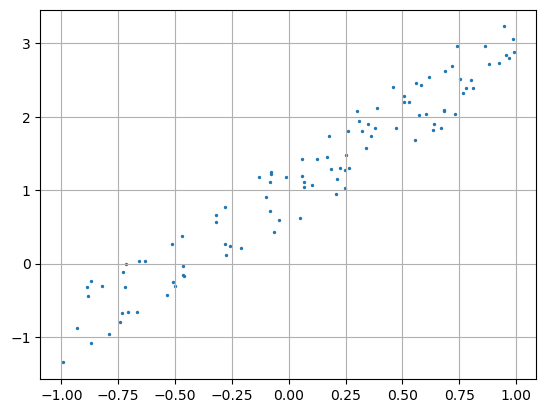

In [5]:
N = 100
x = np.random.uniform(-1, 1, N)
c0 = 1
c1 = 2
error = np.random.rand(N)-.5
y = c0 + c1*x + error
plt.scatter(x,y,s=2)
plt.grid(True)
plt.show()

In [6]:
A = np.vander(x,N=2,increasing=True)
A[:5,:]

array([[ 1.        , -0.63418546],
       [ 1.        ,  0.25087608],
       [ 1.        ,  0.3795731 ],
       [ 1.        ,  0.16652867],
       [ 1.        ,  0.71723463]])

Compute least squares linear regression:

In [7]:
c = np.linalg.solve(A.T@A,A.T@y)

In [8]:
c

array([1.00638476, 1.9757995 ])

In [9]:
B = np.block([[-np.eye(N),-A],[-np.eye(N),A]])
b = np.hstack([-y,y]).reshape((2*N,1))

In [10]:
obj = np.hstack([np.ones(N),np.zeros(2)]).reshape((N+2))

obj = obj/(N+3)

In [11]:
result = linprog(obj,A_ub=B,b_ub=b)

In [12]:
np.round(result.x,2)

array([ 0.27,  0.  ,  0.13,  0.15,  0.31,  0.24,  0.12,  0.25,  0.37,
        0.43,  0.1 ,  0.46,  0.21,  0.34,  0.05,  0.07,  0.12,  0.28,
        0.25,  0.35,  0.05,  0.45,  0.39,  0.33,  0.02,  0.38,  0.08,
        0.31,  0.29,  0.23,  0.1 ,  0.39,  0.16,  0.33,  0.43,  0.04,
        0.05,  0.15,  0.41,  0.19,  0.39,  0.36,  0.32,  0.31,  0.41,
        0.3 ,  0.47,  0.37,  0.32,  0.35,  0.31,  0.1 ,  0.19,  0.2 ,
        0.29,  0.4 ,  0.39,  0.17,  0.07,  0.04,  0.55,  0.05,  0.53,
        0.28,  0.42,  0.  ,  0.38,  0.2 ,  0.52,  0.11,  0.32,  0.19,
        0.31,  0.09,  0.33,  0.16,  0.22,  0.2 ,  0.42,  0.24,  0.07,
        0.23,  0.11,  0.26,  0.44,  0.32,  0.28,  0.31,  0.07,  0.03,
        0.41,  0.3 , -0.  ,  0.41,  0.32,  0.23,  0.38,  0.41,  0.08,
        0.25,  0.99,  1.94])

What are we missing? The bounds are different for $\mathbf{t}$ and $\mathbf{c}$.

In [13]:
bounds = [(0,None) for _ in range(N)] + [(None,None),(None,None)]

In [14]:
result = linprog(obj,A_ub=B,b_ub=b,bounds=bounds)

In [15]:
np.round(result.x,2)

array([ 0.27,  0.  ,  0.13,  0.15,  0.31,  0.24,  0.12,  0.25,  0.37,
        0.43,  0.1 ,  0.46,  0.21,  0.34,  0.05,  0.07,  0.12,  0.28,
        0.25,  0.35,  0.05,  0.45,  0.39,  0.33,  0.02,  0.38,  0.08,
        0.31,  0.29,  0.23,  0.1 ,  0.39,  0.16,  0.33,  0.43,  0.04,
        0.05,  0.15,  0.41,  0.19,  0.39,  0.36,  0.32,  0.31,  0.41,
        0.3 ,  0.47,  0.37,  0.32,  0.35,  0.31,  0.1 ,  0.19,  0.2 ,
        0.29,  0.4 ,  0.39,  0.17,  0.07,  0.04,  0.55,  0.05,  0.53,
        0.28,  0.42,  0.  ,  0.38,  0.2 ,  0.52,  0.11,  0.32,  0.19,
        0.31,  0.09,  0.33,  0.16,  0.22,  0.2 ,  0.42,  0.24,  0.07,
        0.23,  0.11,  0.26,  0.44,  0.32,  0.28,  0.31,  0.07,  0.03,
        0.41,  0.3 , -0.  ,  0.41,  0.32,  0.23,  0.38,  0.41,  0.08,
        0.25,  0.99,  1.94])

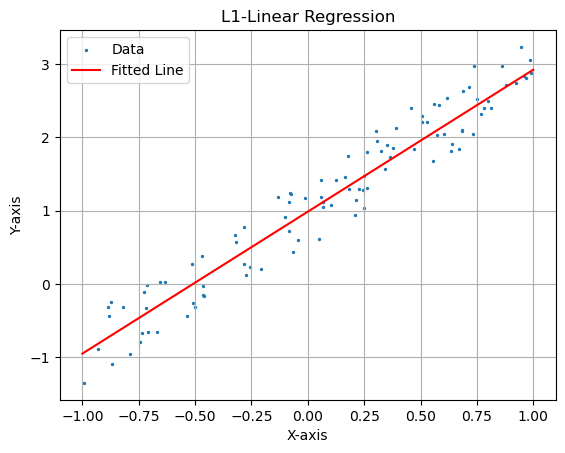

In [16]:
###### should use the same data as generated earlier, rather than re-generate new data ######
# N = 100
# x = np.random.uniform(-1, 1, N)
# c0 = 1
# c1 = 2
# error = np.random.rand(N)-.5
# y = c0 + c1*x + error

# Plot the scatter plot
plt.scatter(x, y, s=2, label='Data')

# Plot the line y = c0 + c1*x
c0 = result.x[-2]
c1 = result.x[-1]
x_range = np.linspace(-1, 1, 100)  # Define the range of x values
y_line = c0 + c1*x_range  # Compute the corresponding y values
plt.plot(x_range, y_line, color='red', label='Fitted Line')

# Add labels to the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a title to the plot
plt.title('L1-Linear Regression')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

## Polynomial Regression

Let us look at a data set which does not have a linear relationship. 

Given data points 

$$
(x_1,y_1), \dots , (x_n,y_n), x_i , y_i \in \mathbb{R}, i = 1, \dots , n
$$

Find a function of the form 

$$
f(x) = c_2x^2 + c_1 x + c_0, \ \text{ here } \ c_2,c_1,c_0 \ \text{are to be determined}
$$

which fits the data, minimizing the average loss

\begin{align*}
\min_{c_2,c_1,c_0 \in \mathbb{R}} \frac{1}{n} \sum_{i=1}^n |y_i - f(x_i)| \\
\min_{c_2,c_1,c_0 \in \mathbb{R}} \frac{1}{n} \sum_{i=1}^n |y_i - (c_2x^2_i + c_1x_i + c_0)| 
\end{align*}

Let us generate this data randomly

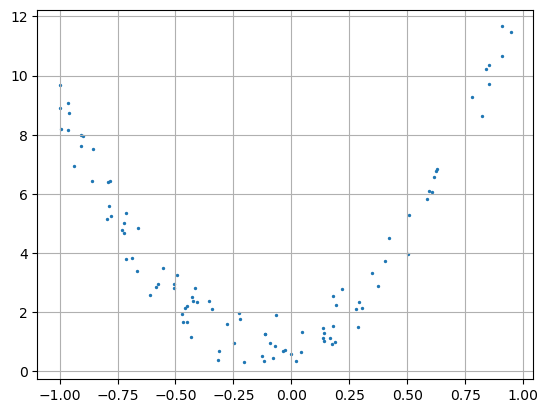

In [17]:
N = 100
x = np.random.uniform(-1, 1, N)
c0 = 1
c1 = 2
c2 = 10
error = 2*np.random.rand(N)-1

y = c0 + c1*x + c2*x**2+error
plt.scatter(x,y,s=2)
plt.grid(True)
plt.show()

Let 

$$
z_i = |y_i - (c_2 x_i^2 + c_1x_i + c_0)|
$$

In linear progrmming formulation, we get:

$$
\begin{cases}
\min & \frac{1}{n}\sum_{i=1}^n z_i & \\ 
\text{subject to } & |y_i - (c_2 x_i^2 + c_1x_i + c_0)| \leqslant z_i, & i = 1, \dots , n \\
& c_0,c_1,c_2 \in \mathbb{R}, z_1,\dots,z_n \geqslant 0 &
\end{cases}
$$

$$
\implies \begin{cases}
\min & \frac{1}{n}\sum_{i=1}^n z_i & \\ 
\text{subject to } & y_i - (c_2 x_i^2 + c_1x_i + c_0) \leqslant z_i, & i = 1, \dots , n \\
& (c_2 x_i^2 + c_1x_i + c_0) - y_i \leqslant z_i, & i = 1, \dots , n \\
& c_0,c_1,c_2 \in \mathbb{R}, z_1,\dots,z_n \geqslant 0 &
\end{cases}
$$

$$
\implies \begin{cases}
\min & \frac{1}{n}\sum_{i=1}^n z_i & \\ 
\text{subject to } & -c_2 x_i^2 -c_1x_i -c_2 - z_i \leqslant -y_i, & i = 1, \dots , n \\
& (c_2 x_i^2 + c_1x_i + c_0) - z_i \leqslant y_i, & i = 1, \dots , n \\
& c_0,c_1,c_2 \in \mathbb{R}, z_1,\dots,z_n \geqslant 0 &
\end{cases}
$$

Rewriting the constraints in matrix form we get:

$$
\begin{bmatrix}
-1 & & &-1 & - x_1 & -x_1^2 \\
  & \ddots &  & \dots & \dots & \dots \\
   &  & -1 &-1 & - x_n & -x_n^2 \\
  -1 &  &  & 1 & x_1 & x_1^2 \\
  & \ddots &  & \dots & \dots & \dots \\
  &  & -1 & 1 & x_n & x_n^2 \\
\end{bmatrix}
\begin{bmatrix} z_1 \\ \vdots \\ z_n \\ c_2 \\ c_1 \\ c_0 \end{bmatrix}
=
\begin{bmatrix} -I & -A \\ -I & A \end{bmatrix}
\begin{bmatrix} \mathbf{t} \\ \mathbf{c} \end{bmatrix}
\leqslant
\begin{bmatrix} -\mathbf{y} \\ \mathbf{y} \end{bmatrix}
$$

In [18]:
A = np.vander(x,N=3,increasing=True)
A[:5,:]

array([[ 1.        ,  0.28859428,  0.08328666],
       [ 1.        , -0.7787462 ,  0.60644564],
       [ 1.        , -0.96086814,  0.92326758],
       [ 1.        ,  0.13662499,  0.01866639],
       [ 1.        , -0.45736145,  0.2091795 ]])

In [19]:
c = np.linalg.solve(A.T@A,A.T@y)

In [20]:
c

array([ 0.98801251,  2.03183912, 10.19338835])

In [21]:
B = np.block([[-np.eye(N),-A],[-np.eye(N),A]])
b = np.hstack([-y,y]).reshape((2*N,1))

In [22]:
obj = np.hstack([np.ones(N),np.zeros(3)]).reshape((N+3))

obj = obj/(N+3)

In [23]:
result = linprog(obj,A_ub=B,b_ub=b)

solution by linprog:
c0=0.8531061311988919, c1=2.1419113966159045, c2=10.560342518244724



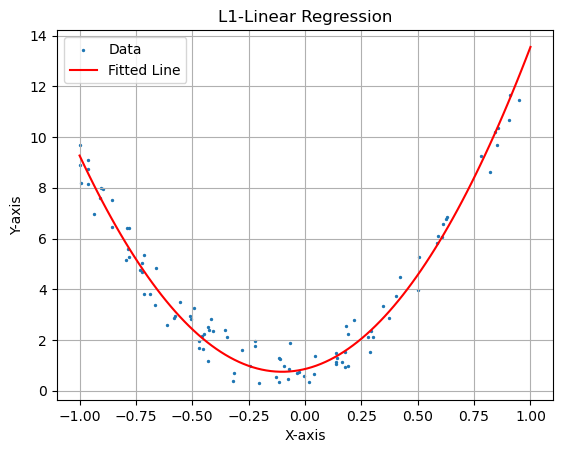

In [24]:
###### should use the same data as generated earlier, rather than re-generate new data ######
# N = 100
# x = np.random.uniform(-1, 1, N)
# c0 = 1
# c1 = 2
# c2 = 10
# error = 2*np.random.randn(N)
# y = c0 + c1*x + c2*x**2+error

# Plot the scatter plot
plt.scatter(x, y, s=2, label='Data')

# Plot the line y = c0 + c1*x
c0 = result.x[-3]
c1 = result.x[-2]
c2 = result.x[-1]

print(f"solution by linprog:\nc0={c0}, c1={c1}, c2={c2}\n")

x_range = np.linspace(-1, 1, 100)  # Define the range of x values
y_line = c0 + c1*x_range + c2*x_range**2 # Compute the corresponding y values
plt.plot(x_range, y_line, color='red', label='Fitted Line')

# Add labels to the axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Add a title to the plot
plt.title('L1-Linear Regression')

# Add a legend
plt.legend()

# Display the plot
plt.grid(True)
plt.show()

Compare solution by *ortools*

In [27]:
from ortools.linear_solver import pywraplp

solver = pywraplp.Solver.CreateSolver('GLOP')

# name and declare variables, 'z1','z2','z3',... 'c2','c1','c0',
zs = ['z'+str(j) for j in range(1,N+1)]
zs.extend(['c2','c1','c0'])

# 'z1','z2','z3',... nonnegative
vars = [solver.NumVar(0, solver.infinity(), z) for z in zs[:-3]]
# 'c2','c1','c0' have range in R
vars.extend([solver.NumVar(-solver.infinity(), solver.infinity(), z) for z in zs[-3:]])

# constraints, one per inequality (equality)
constraints = []
for i, _ in enumerate(b):
    constraints.append(solver.Constraint(-solver.infinity(),b[i,0]))
    for j, _ in enumerate(B[i]):
        constraints[i].SetCoefficient(vars[j], B[i,j])

# objective: min
objective = solver.Objective()
for j, _ in enumerate(obj):
    objective.SetCoefficient(vars[j], obj[j])
objective.SetMinimization()

status = solver.Solve()

c0_bar = vars[-3].solution_value()
c1_bar = vars[-2].solution_value()
c2_bar = vars[-1].solution_value()

print(f"solution by ortools:\nc0={c0_bar}, c1={c1_bar}, c2={c2_bar}\n")


solution by ortools:
c0=0.8531061311988913, c1=2.1419113966159027, c2=10.560342518244726



## Least Squares (L2 Regression)

Consider points $(x_0,y_0),\dots,(x_{N-1})$. Find $c_0$ and $c_1$ minimimize

$$
\sum_{n=0}^{N-1} | y_n - (c_0 + c_1 x_n) |^2 = \| \mathbf{y} - A \mathbf{c} \|^2_2
$$

Coefficients are given by the solution of the normal equations $A^T A \mathbf{c} = A^T \mathbf{y}$ where

$$
A = \begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_{N-1}\end{bmatrix}
\hspace{10mm}
\mathbf{c} = \begin{bmatrix} c_0 \\ c_1 \end{bmatrix}
$$

To perform L2 regression for the given problem, we need to minimize the sum of squared errors instead of the absolute errors. We can rewrite the objective function as follows:

$$
\min_{c_2, c_1, c_0 \in \mathbb{R}} \frac{1}{n} \sum_{i=1}^{n} (y_i - f(x_i))^2
$$

Where $$ f(x) = c_2x^2 + c_1x + c_0 $$.

### Examples

Suppose we want to fit a curve of the form,

$$
x+c
$$

i.e. the slope is known, but the constant $c$ is not. The data we have are $(0,0)$, $(10,11)$.

Then the L1 optimization is:

$$
minimize \, | c | + | c-1 | \, over\, c \in \mathbb{R}
$$

The objective is strictly greater than 1 whenever $c<0$ or $c>1$. In the range $0 \leqslant c \leqslant 1$, the objective is always $1$. Hence any value between $[0,1]$ is a solution for $c$. Not unique!